In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.impute import SimpleImputer
import numpy as np

df = pd.read_excel('Actual_Data_South.xlsx')

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix

# Filter dataset for relevant policy statuses
df_filtered = df[df['Policy Status'].isin(['Renewed', 'Not Renewed'])]
df_filtered['Status_Binary'] = df_filtered['Policy Status'].apply(lambda x: 1 if x == 'Not Renewed' else 0)

# Select relevant columns
selected_columns = ['age', 'Before GST Add-on GWP', 'Total OD Premium', 
                    'Total TP Premium', 'gst', 'Total Premium Payable', 
                    'NCB % Previous Year', 'Applicable Discount with NCB', 
                    'decline', 'Policy Tenure', 'Customer Tenure', 
                    'New Customers', 'Churn Label', 'Renewal Rate Status', 
                    'Claim in last year', 'Number of Claims', 'Status_Binary', 'Product name  2', 'biztype']
df_selected = df_filtered[selected_columns]

# Convert numerical columns to float
numerical_columns = ['age', 'Before GST Add-on GWP', 'Total OD Premium', 
                     'Total TP Premium', 'gst', 'Total Premium Payable', 
                     'NCB % Previous Year', 'Applicable Discount with NCB', 
                     'Policy Tenure', 'Customer Tenure', 'New Customers', 
                     'Claim in last year', 'Number of Claims']
df_selected[numerical_columns] = df_selected[numerical_columns].apply(pd.to_numeric, errors='coerce')

# One-hot encode categorical columns
categorical_columns = ['decline', 'Churn Label', 'Renewal Rate Status', 'Product name  2', 'biztype']
df_selected = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_selected = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Convert to sparse matrix
X = csr_matrix(df_selected.drop(columns=['Status_Binary']).values)
y = df_selected['Status_Binary']

# Debugging dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\2541403318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Status_Binary'] = df_filtered['Policy Status'].apply(lambda x: 1 if x == 'Not Renewed' else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\2541403318.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numerical_columns] = df_selected[numerical_columns].apply(pd.to_numeric, errors='coerce')


Shape of X: (439910, 21)
Shape of y: (439910,)



Moderate Decision Tree Rules:
|--- Churn Label_Yes <= 0.50
|   |--- Renewal Rate Status_Null <= 0.50
|   |   |--- class: 1.0
|   |--- Renewal Rate Status_Null >  0.50
|   |   |--- Customer Tenure <= 2.50
|   |   |   |--- decline_Yes <= 0.50
|   |   |   |   |--- Customer Tenure <= 1.50
|   |   |   |   |   |--- age <= 1.00
|   |   |   |   |   |   |--- biztype_Renewal Business <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- biztype_Renewal Business >  0.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- age >  1.00
|   |   |   |   |   |   |--- Applicable Discount with NCB <= 65.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Applicable Discount with NCB >  65.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Customer Tenure >  1.50
|   |   |   |   |   |--- biztype_Renewal Business <= 0.50
|   |   |   |   |   |   |--- Applicable Discount with NCB <= 77.16
|   |   |   |   |   |   |   |--- cl

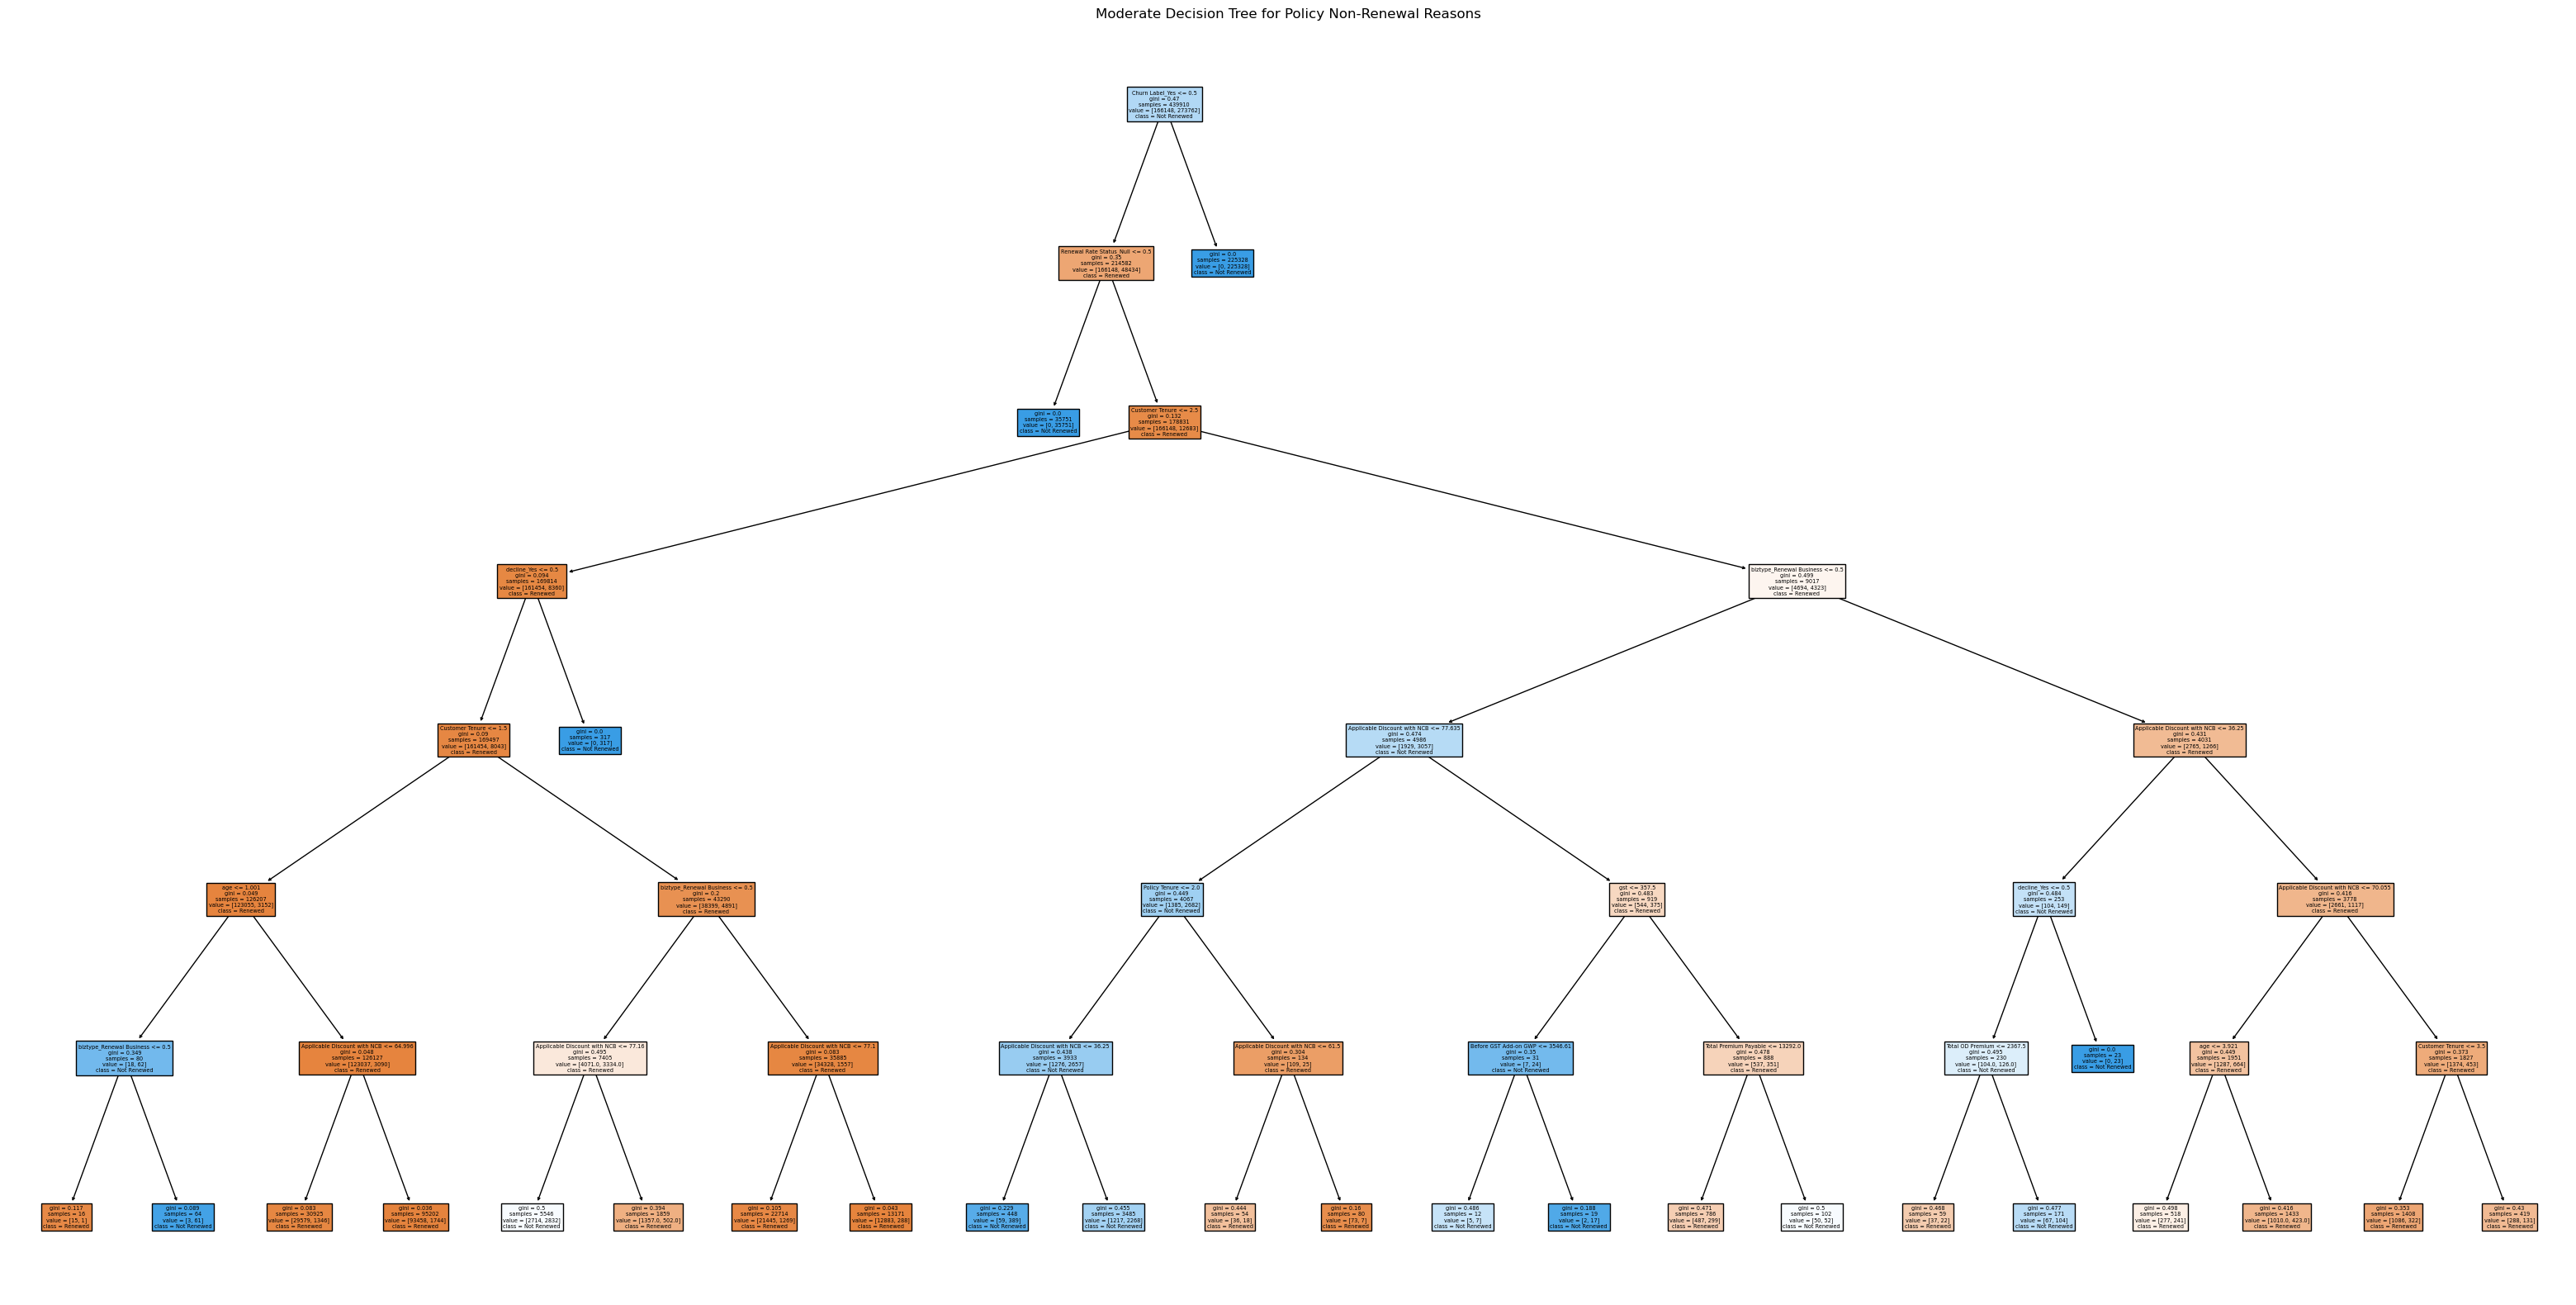

In [4]:
# Evaluate Decision tree model
dt_model_moderate = DecisionTreeClassifier(
    max_depth=7,                
    min_samples_split=20,       
    min_samples_leaf=10,        
    random_state=42
)
dt_model_moderate.fit(X, y)

# Export tree rules as text
tree_rules_moderate = export_text(dt_model_moderate, feature_names=df_selected.drop(columns=['Status_Binary']).columns)
print("\nModerate Decision Tree Rules:")
print(tree_rules_moderate)

# Plot the decision tree
plt.figure(figsize=(40, 20))  
plot_tree(dt_model_moderate, 
          feature_names=df_selected.drop(columns=['Status_Binary']).columns, 
          class_names=['Renewed', 'Not Renewed'], 
          filled=True)

plt.title('Moderate Decision Tree for Policy Non-Renewal Reasons')

plt.savefig("decision_tree_large South (23&24).png", dpi=300)  
plt.show()

with open("decision_tree_rules_test South (23&24).txt", "w") as file:
    file.write(tree_rules_moderate)

Feature Importance (all features):
age                              0.001070
Before GST Add-on GWP            0.000721
Total OD Premium                 0.000438
Total TP Premium                 0.000392
gst                              0.000407
Total Premium Payable            0.000617
NCB % Previous Year              0.000634
Applicable Discount with NCB     0.001616
Policy Tenure                    0.001060
Customer Tenure                  0.016145
New Customers                    0.000000
Claim in last year               0.000000
Number of Claims                 0.000493
decline_Yes                      0.002761
Churn Label_Yes                  0.679414
Renewal Rate Status_Increase     0.000000
Renewal Rate Status_No Change    0.000000
Renewal Rate Status_Null         0.278152
Product name  2_SOD              0.000000
biztype_Renewal Business         0.015103
biztype_Roll Over                0.000979
dtype: float32


C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\483741907.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="coolwarm")


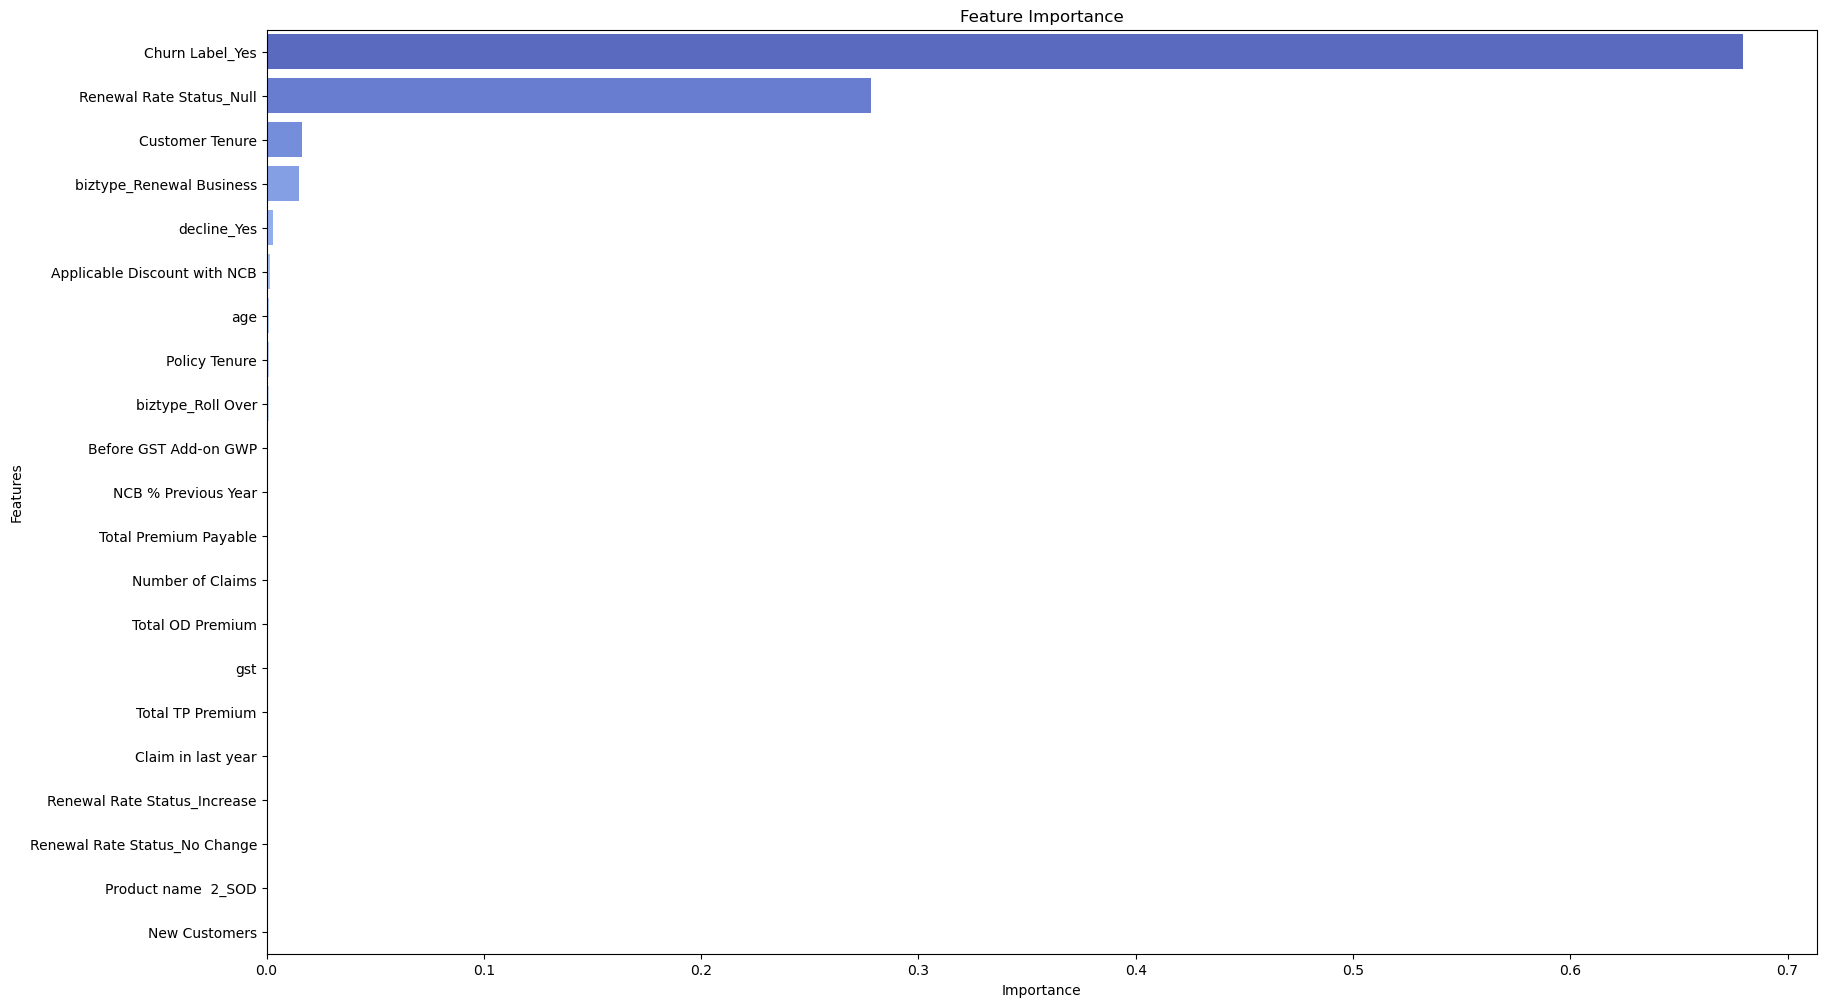

In [5]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

model.fit(X, y)

# Evaluate the Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=df_selected.drop(columns=['Status_Binary']).columns)

print("Feature Importance (all features):")
print(feature_importances)

# Plot the Feature importance graph
plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index, palette="coolwarm")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

feature_importances_df = pd.DataFrame({'Feature': feature_importances.index, 'Importance': feature_importances.values})
feature_importances_df.to_csv('feature_importances south (23&24).csv', index=False)